![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
47737,id_6025,Barcelona,['Turkish'],6026.0,$,6.0,"[['Great Kebab'], ['01/24/2017']]",/Restaurant_Review-g187497-d11806771-Reviews-R...,d11806771,1,4.0
14406,id_12612,London,['Thai'],12622.0,NaN,NaN,"[[], []]",/Restaurant_Review-g186338-d5079223-Reviews-Sp...,d5079223,1,4.0
35676,id_195,Copenhagen,"['Fast Food', 'Asian', 'Thai', 'Fusion', 'Vege...",196.0,$,112.0,[['Authentic taste made consumable for an Eur....,/Restaurant_Review-g189541-d3357291-Reviews-Sc...,d3357291,1,4.5
7614,id_7614,Oslo,"['Asian', 'Thai', 'Vegetarian Friendly', 'Glut...",71.0,$,377.0,"[['Simple, but nice and friendly', 'Loved the ...",/Restaurant_Review-g190479-d809983-Reviews-Ric...,d809983,0,0.0
20235,id_1153,Hamburg,"['Cafe', 'Delicatessen', 'Vegetarian Friendly']",1155.0,$$ - $$$,15.0,"[['Lovely Cafe/Restaurant', 'Small cosy restau...",/Restaurant_Review-g187331-d3784313-Reviews-Ta...,d3784313,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
def prep_city(data):
    return pd.get_dummies(data, columns=['City'], dummy_na=True)
data = prep_city(data)

In [20]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
45346,id_615,"['European', 'Central European', 'Hungarian', ...",616.0,$$ - $$$,176.0,"[['Traditional Hungarian, boring decoration', ...",/Restaurant_Review-g274887-d692901-Reviews-Rem...,d692901,1,4.0,...,0,0,0,0,0,0,0,0,0,0
28004,id_537,"['Polish', 'Eastern European', 'Central Europe...",538.0,$,136.0,"[['Nice location', 'One time experience'], ['0...",/Restaurant_Review-g274856-d3724132-Reviews-Ba...,d3724132,1,3.5,...,0,0,0,0,0,0,0,1,0,0
16944,id_1651,"['European', 'Portuguese']",1652.0,$,28.0,"[['Another great local bakery / restaurant!', ...",/Restaurant_Review-g189158-d8024747-Reviews-Ac...,d8024747,1,4.0,...,0,0,0,0,0,0,0,0,0,0
14364,id_224,"['Nepali', 'Vegetarian Friendly']",225.0,$$ - $$$,13.0,"[['Excellent Nepalese', 'Amazing Nepalese Food...",/Restaurant_Review-g189934-d12063468-Reviews-S...,d12063468,1,5.0,...,0,0,0,0,0,0,0,0,0,0
34638,id_10685,NaN,10695.0,NaN,3.0,"[['Japanese evening', 'Exquisite luxury'], ['0...",/Restaurant_Review-g186338-d10468866-Reviews-A...,d10468866,1,4.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [22]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [23]:
def prep_price_range(df):
    dct = {'$$ - $$$': 2, '$': 1, '$$$$': 3}
    df["Price Range"].replace(to_replace=dct, inplace=True)
    df["Price Range"].fillna(2, inplace=True)
    return df
data = prep_price_range(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
Restaurant_id              50000 non-null object
Cuisine Style              38410 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null float64
Number of Reviews          50000 non-null float64
Reviews                    49998 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
City_Amsterdam             50000 non-null uint8
City_Athens                50000 non-null uint8
City_Barcelona             50000 non-null uint8
City_Berlin                50000 non-null uint8
City_Bratislava            50000 non-null uint8
City_Brussels              50000 non-null uint8
City_Budapest              50000 non-null uint8
City_Copenhage

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

Признак "Cuisines"

In [24]:
import ast

def txt_to_dct(json_text):
    return ast.literal_eval(json_text.replace('nan','\'\''))

def prep_cuisines_count(cuisines, id_col):
    cuisine_cnt_df = cuisines.groupby(id_col).nunique()
    cuisine_cnt_df.columns=[id_col,"cuisines_cnt"]
    cuisine_cnt_df = cuisine_cnt_df[["cuisines_cnt"]].reset_index()   
    return cuisine_cnt_df

def prep_cuisines_dummies(cuisines, id_col, style_col):
    top_kitchens = cuisines[style_col].value_counts()[:25].index 
    cuisines[style_col]=cuisines[style_col].apply(lambda c: c if c in top_kitchens else 'other')
    cuisines = pd.get_dummies(cuisines,columns=[style_col]).groupby(id_col).sum().reset_index()    
    return cuisines
    
def prep_cuisines_parse_explode(df, id_col, style_col):
    cuisines = df[[id_col,style_col]].copy()
    cuisines[style_col].fillna('["Unknown"]', inplace=True)
    cuisines[style_col] = cuisines[style_col].apply(txt_to_dct)
    cuisines = cuisines.explode(style_col)
    return cuisines

def prep_cuisines(df, id_col, style_col):
    cuisines = prep_cuisines_parse_explode(df, id_col, style_col)    
    cuisine_cnt_df = prep_cuisines_count(cuisines, id_col)
    cuisine_dummies = prep_cuisines_dummies(cuisines, id_col, style_col)
    df=df.merge(cuisine_cnt_df, how="left", on=id_col)
    df=df.merge(cuisine_dummies, how="left", on=id_col)
    return df

data = prep_cuisines(data, "ID_TA", "Cuisine Style")
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Cuisine Style_Pizza,Cuisine Style_Portuguese,Cuisine Style_Pub,Cuisine Style_Seafood,Cuisine Style_Spanish,Cuisine Style_Sushi,Cuisine Style_Unknown,Cuisine Style_Vegan Options,Cuisine Style_Vegetarian Friendly,Cuisine Style_other
37452,id_4829,['Spanish'],4832.0,1.0,28.0,"[['Free wifi & great coffee', 'Delicious Cuisi...",/Restaurant_Review-g187514-d990762-Reviews-Rod...,d990762,1,4.0,...,0,0,0,0,1,0,0,0,0,0
28668,id_1712,"['Asian', 'Thai', 'Vegetarian Friendly']",1715.0,2.0,107.0,"[['Thailand’s little kitchen', 'What a little ...",/Restaurant_Review-g186338-d804199-Reviews-Jas...,d804199,1,4.5,...,0,0,0,0,0,0,0,0,1,1
35361,id_22,"['Chinese', 'Asian', 'Vegetarian Friendly', 'V...",23.0,3.0,1391.0,"[['Great food', 'Love this place!'], ['01/03/2...",/Restaurant_Review-g190479-d778704-Reviews-Din...,d778704,1,4.5,...,0,0,0,0,0,0,0,1,1,0
2501,id_2501,"['French', 'Wine Bar']",5339.0,2.0,43.0,"[['Hidden Gem'], ['07/26/2016']]",/Restaurant_Review-g187147-d6886607-Reviews-Re...,d6886607,0,0.0,...,0,0,0,0,0,0,0,0,0,1
47490,id_2014,"['German', 'Mediterranean', 'European', 'Centr...",2016.0,2.0,21.0,"[['Casual sophistication', 'Nice and Interesti...",/Restaurant_Review-g187323-d958709-Reviews-New...,d958709,1,4.0,...,0,0,0,0,0,0,0,1,1,1


Признак "Reviews"

In [25]:
def prep_reviews_to_columns(df, id_col, reviews_col):
    reviews = df[[id_col, reviews_col]].copy()
    reviews.drop_duplicates(inplace=True)
    reviews[reviews_col] = reviews[reviews_col].fillna("[[],[]]")
    reviews_as_array = reviews[reviews_col].apply(txt_to_dct)
    reviews["review_2"] = reviews_as_array.apply(
        lambda r: r[0][0] if len(r[0]) > 0 else None)
    reviews["review_2_date"] = pd.to_datetime(
    reviews_as_array.apply(lambda r: r[1][0] if len(r[1]) > 0 else None))
    reviews["review_1"] = reviews_as_array.apply(
        lambda r: r[0][1] if len(r[0]) > 1 else None)
    reviews["review_1_date"] = pd.to_datetime(
    reviews_as_array.apply(lambda r: r[1][1] if len(r[1]) > 1 else None))
    return reviews


def prep_reviews_add_dates_features(reviews):
    today = max(reviews.review_1_date.max(), reviews.review_2_date.max())
    reviews["days_since_last_review"] = (
         today-reviews[["review_1_date", "review_2_date"]].max(axis=1)).dt.days
    reviews["days_between_reviews"] = (
         np.abs(reviews.review_2_date - reviews.review_1_date)).dt.days
    return reviews

def prep_reviews_replace_date_outliers_and_na(reviews):
    days_between_reviews_threshold = reviews.days_between_reviews.quantile(0.90)
    reviews[reviews.days_between_reviews>days_between_reviews_threshold].days_between_reviews = days_between_reviews_threshold

    days_since_last_review_threshold = reviews.days_since_last_review.quantile(0.90)
    reviews[reviews.days_since_last_review>days_since_last_review_threshold].days_since_last_review = days_since_last_review_threshold

    reviews.days_between_reviews.fillna(days_between_reviews_threshold, inplace=True)
    reviews.days_since_last_review.fillna(days_since_last_review_threshold, inplace=True)
    return reviews

def prep_reviews_add_positive_feature(reviews):
    extremely_positive_keywords = '|'.join(["great", "very", "excellent", "delicious", "amazing", "best", "lovely"])
    reviews["extremely_positive_keywords"]=(reviews.review_1.str.lower().str.contains(extremely_positive_keywords) | 
                                            reviews.review_2.str.lower().str.contains(extremely_positive_keywords)).\
        apply(lambda v: 1 if v else 0)
    return reviews

def prep_reviews(df, id_col, reviews_col):
    reviews = prep_reviews_to_columns(df, id_col, reviews_col)    
    reviews = prep_reviews_add_dates_features(reviews)
    reviews = prep_reviews_replace_date_outliers_and_na(reviews)
    reviews = prep_reviews_add_positive_feature(reviews)
    return df.merge(reviews[[id_col,"days_since_last_review","days_between_reviews", "extremely_positive_keywords"]], how="left", on=id_col)

data = prep_reviews(data, "ID_TA", "Reviews")
data.sample(5)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Cuisine Style_Seafood,Cuisine Style_Spanish,Cuisine Style_Sushi,Cuisine Style_Unknown,Cuisine Style_Vegan Options,Cuisine Style_Vegetarian Friendly,Cuisine Style_other,days_since_last_review,days_between_reviews,extremely_positive_keywords
30802,id_2093,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",2094.0,2.0,376.0,"[['Loved it', 'Where the locals eat'], ['11/12...",/Restaurant_Review-g187791-d2358016-Reviews-La...,d2358016,1,4.0,...,0,0,0,0,0,1,0,106.0,18.0,0
35690,id_1092,['Chinese'],1093.0,2.0,7.0,"[['Very good delivery service', 'Very good non...",/Restaurant_Review-g274772-d7177190-Reviews-Zo...,d7177190,1,3.5,...,0,0,0,0,0,0,0,1185.0,35.0,1
25144,id_36,"['Dutch', 'European', 'Vegetarian Friendly', '...",37.0,1.0,264.0,"[['The King of potatoes', '10/10'], ['01/07/20...",/Restaurant_Review-g188590-d12341057-Reviews-J...,d12341057,1,4.5,...,0,0,0,0,1,1,1,50.0,20.0,0
11204,id_2468,"['Chinese', 'Minority Chinese']",2473.0,2.0,7.0,"[['I lovely old building, tasty traditional C....",/Restaurant_Review-g274707-d7899101-Reviews-Ch...,d7899101,1,4.0,...,0,0,0,0,0,0,1,213.0,36.0,1
14866,id_8368,NaN,8375.0,2.0,2.0,"[[], []]",/Restaurant_Review-g187514-d10786375-Reviews-M...,d10786375,1,3.0,...,0,0,0,1,0,0,0,704.0,350.0,0


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

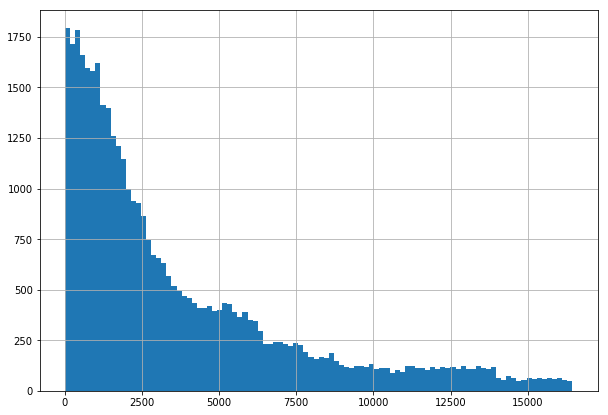

In [26]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

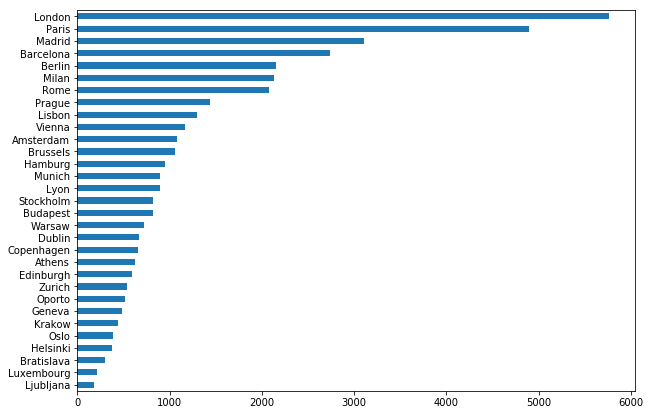

In [27]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

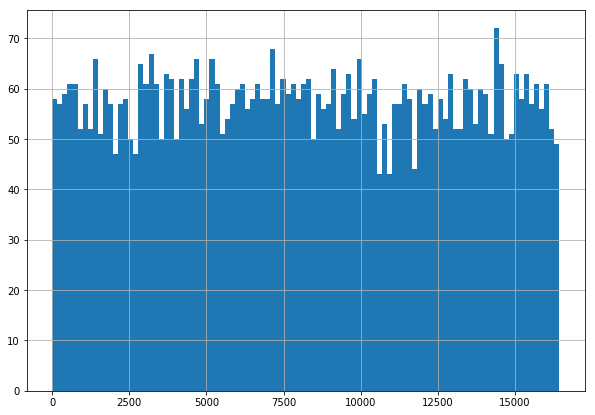

In [28]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

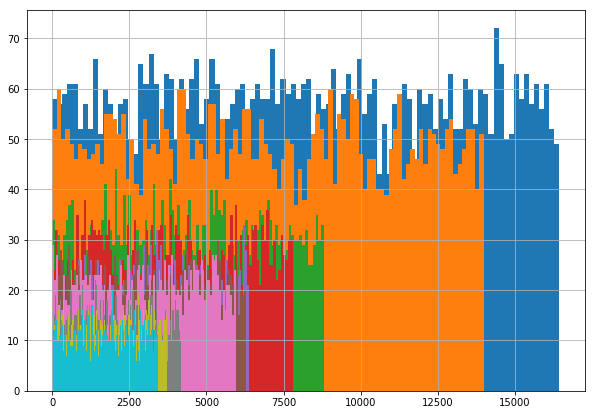

In [29]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

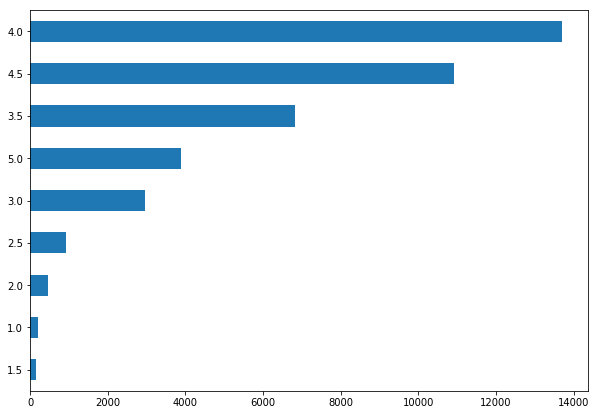

In [30]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

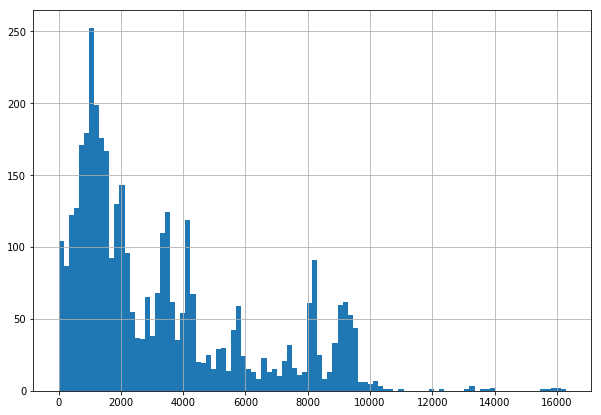

In [31]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

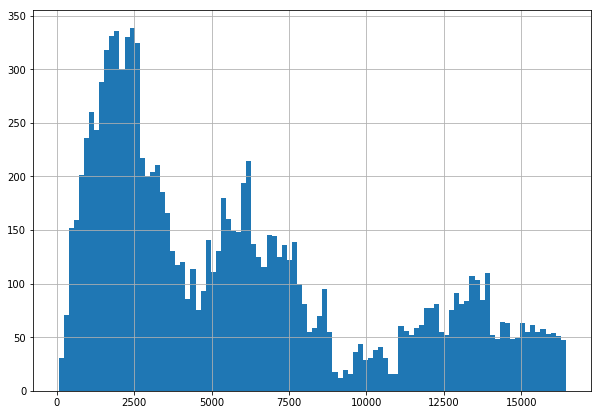

In [32]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

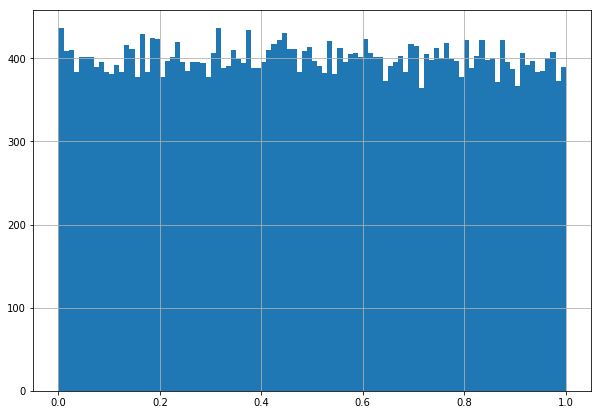

In [33]:
def prep_ranking_by_city(df, ranking_col, city_col):
    by_city_ranking_stats = df.groupby(city_col).agg({ranking_col : ['min', 'max']}).reset_index()
    by_city_ranking_stats.columns = [city_col, "ranking_min", "ranking_max"]
    df = df.merge(by_city_ranking_stats, how="left", on=city_col)
    df["ranking_mid"] = (df[ranking_col] - df.ranking_min) / (df.ranking_max - df.ranking_min)
    df.drop(["ranking_min", "ranking_max", ranking_col], axis = 1, inplace = True)
    return df

df_train = prep_ranking_by_city(df_train, "Ranking", "City")
df_train['ranking_mid'].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

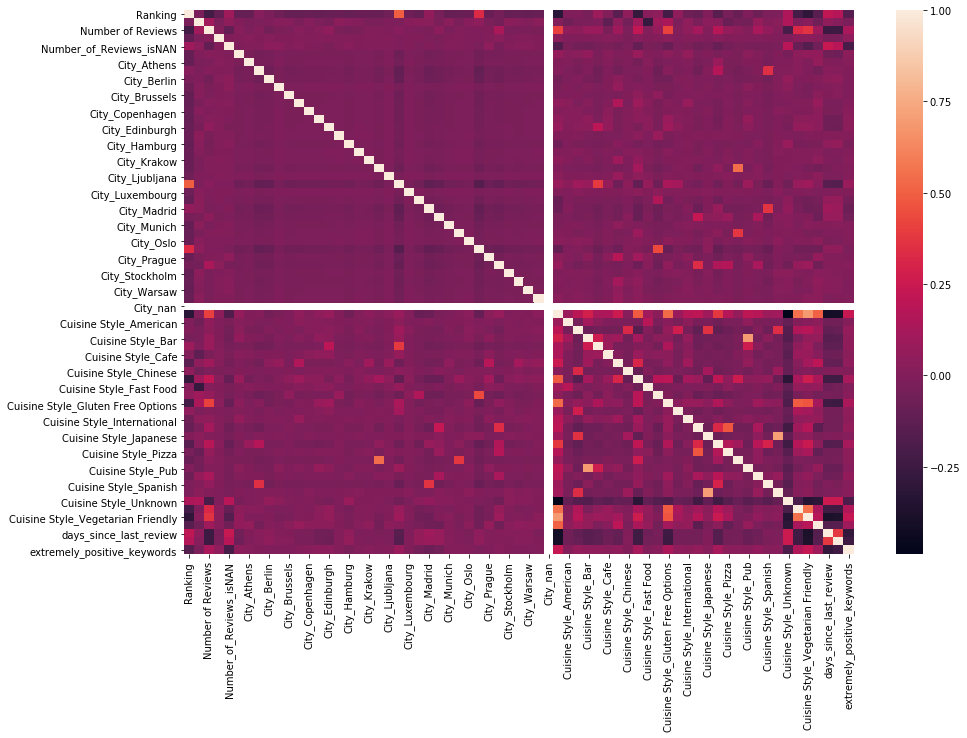

In [34]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [35]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [36]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy() 
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output.drop_duplicates(subset=['City', 'Cuisine Style', 'Rating','Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample'], inplace=True)
    # тут ваш код по обработке NAN 
    
    # ################### 3. Encoding ############################################################## 
    df_output = prep_ranking_by_city(df_output, "Ranking", "City")
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    df_output.drop(['City_nan',], axis = 1, inplace=True)
    # тут ваш код не Encoding фитчей   
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    df_output = prep_cuisines(df_output, "ID_TA", "Cuisine Style")
    df_output = prep_reviews(df_output, "ID_TA", "Reviews")
    df_output = prep_price_range(df_output)
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    object_columns = [q for q in df_output.columns if df_output[q].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [37]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Price Range,Number of Reviews,sample,Rating,ranking_mid,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,Cuisine Style_Seafood,Cuisine Style_Spanish,Cuisine Style_Sushi,Cuisine Style_Unknown,Cuisine Style_Vegan Options,Cuisine Style_Vegetarian Friendly,Cuisine Style_other,days_since_last_review,days_between_reviews,extremely_positive_keywords
29558,2.0,0.0,1,4.0,0.786028,0,0,0,1,0,...,0,0,0,1,0,0,0,955.0,350.0,0
38111,2.0,604.0,1,3.5,0.201727,0,0,0,0,0,...,0,0,0,0,1,1,0,60.0,0.0,0
26655,2.0,4.0,1,2.5,0.964703,0,0,1,0,0,...,0,0,0,0,0,0,1,2661.0,350.0,0
29342,2.0,11.0,1,3.5,0.975981,0,0,0,1,0,...,0,0,0,0,0,0,1,113.0,135.0,0
32449,2.0,2.0,1,3.0,0.874543,0,0,0,0,0,...,0,0,0,1,0,0,0,493.0,350.0,0
44987,2.0,96.0,1,4.0,0.232640,0,0,0,0,0,...,0,0,0,0,0,0,0,445.0,181.0,1
10055,1.0,4.0,1,4.5,0.627329,0,0,0,0,0,...,0,0,0,0,0,0,0,709.0,350.0,0
41096,2.0,102.0,1,4.0,0.310539,0,0,0,0,0,...,0,0,0,0,0,1,0,293.0,8.0,0
23214,2.0,803.0,1,3.0,0.629479,0,0,0,0,0,...,0,0,0,0,0,1,1,54.0,17.0,0
5639,2.0,2.0,0,0.0,0.852106,0,0,0,0,0,...,0,0,0,1,0,0,0,634.0,350.0,0


In [38]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49980 entries, 0 to 49979
Data columns (total 66 columns):
Price Range                          49980 non-null float64
Number of Reviews                    49980 non-null float64
sample                               49980 non-null int64
Rating                               49980 non-null float64
ranking_mid                          49980 non-null float64
City_Amsterdam                       49980 non-null uint8
City_Athens                          49980 non-null uint8
City_Barcelona                       49980 non-null uint8
City_Berlin                          49980 non-null uint8
City_Bratislava                      49980 non-null uint8
City_Brussels                        49980 non-null uint8
City_Budapest                        49980 non-null uint8
City_Copenhagen                      49980 non-null uint8
City_Dublin                          49980 non-null uint8
City_Edinburgh                       49980 non-null uint8
City_Geneva  

In [39]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [40]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [41]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 65), (39980, 65), (39980, 64), (31984, 64), (7996, 64))

# Model 
Сам ML

In [42]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [43]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [44]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [45]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2038769384692346


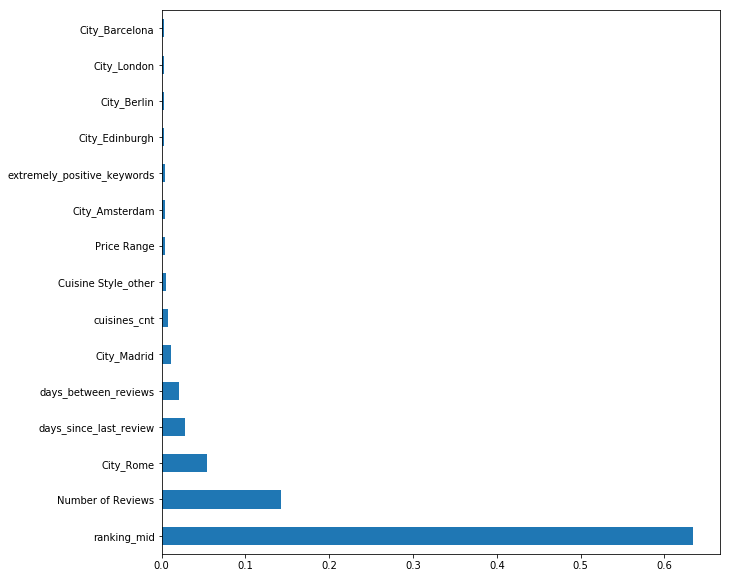

In [46]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [47]:
test_data.sample(10)

,Price Range,Number of Reviews,Rating,ranking_mid,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,...,Cuisine Style_Seafood,Cuisine Style_Spanish,Cuisine Style_Sushi,Cuisine Style_Unknown,Cuisine Style_Vegan Options,Cuisine Style_Vegetarian Friendly,Cuisine Style_other,days_since_last_review,days_between_reviews,extremely_positive_keywords
5928,2.0,54.0,0.0,0.711622,0,0,0,0,0,1,...,0,0,0,0,0,0,1,550.0,1235.0,0
2141,2.0,6.0,0.0,0.578595,0,0,0,0,0,0,...,0,0,0,1,0,0,0,704.0,350.0,0
4697,1.0,56.0,0.0,0.245576,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54.0,7.0,1
8952,2.0,133.0,0.0,0.099860,0,0,0,0,0,0,...,0,0,0,0,0,0,2,67.0,5.0,1
9244,2.0,248.0,0.0,0.179082,0,0,0,0,0,0,...,0,0,0,0,0,1,0,109.0,224.0,1
5375,2.0,34.0,0.0,0.432185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,81.0,262.0,0
2392,2.0,422.0,0.0,0.264282,0,0,0,0,0,0,...,0,0,0,0,0,0,4,50.0,17.0,0
8858,2.0,7.0,0.0,0.598727,0,0,0,0,0,0,...,0,0,0,1,0,0,0,246.0,350.0,0
9739,2.0,0.0,0.0,0.775177,0,0,0,0,0,0,...,0,0,0,1,0,0,0,704.0,350.0,0
912,2.0,1044.0,0.0,0.129508,0,0,1,0,0,0,...,0,1,0,0,0,1,0,58.0,29.0,0


In [48]:
test_data = test_data.drop(['Rating'], axis=1)

In [49]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [50]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [51]:
predict_submission

array([3.045, 4.34 , 4.385, ..., 3.04 , 4.47 , 4.23 ])

In [52]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.045
1,id_1,4.340
2,id_2,4.385
3,id_3,4.260
4,id_4,4.515
5,id_5,4.390
6,id_6,2.390
7,id_7,3.335
8,id_8,4.270
9,id_9,4.615


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
